In [3]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
from causalgraphicalmodels import CausalGraphicalModel


A.

DERIVAR IS DESDE LA DEMANDA AGREGADA

Ecuación del ingreso de equilibrio a corto plazo que fue obtenida a partir del equilibrio $(Y = DA)$:

$$ Y = \frac{1}{1 - (b - m)(1 - t)} (C_0 + I_0 + G_0 + X_0 - hr) $$

Luego de algunas operaciones, podemos expresar la ecuación en función de la tasa de interés $(r)$:

$$ r = \frac{1}{h}(C_0 + G_0 + I_0 + X_0) - \frac{1 - (b - m)(1 - t)}{h}Y $$

Entonces, la curva IS puede ser simplificada de la siguiente manera:

$$ r = \frac{B_0}{h} - \frac{B_1}{h}Y $$

Donde $ B_0 = C_0 + G_0 + I_0 + X_0  $ y $  B_1 = 1 - (b - m)(1 - t) $



In [28]:
#parametros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
r = 0.3

Y = np.arange(Y_size)


In [13]:
#Para la diferencial
#1. Se debe encontrar la ecuación de equilibrio
Yequi = (1 / (1-(b-m)*(1-t))) * (Co + Io + Go + Xo - h*r)

#2. Declarar cada elemento/variable(excepto Y) como symbol 
Co, Io, Go, Xo, h, r, b, m, r = symbols('Co Io Go Xo h r b m r')

#3. Ejecutar la funcion diff para encontrar el diferencial
dYequi_r = diff(Yequi, r)
dYequi_r #∆Y/∆r


-h/(-(1 - t)*(b - m) + 1)

La pendiente es negativa y se crea un desequilibrio

DEMANDA 
AGREGADA

In [30]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3
r = 0.9

Y = np.arange(Y_size)

# ingreso de equilibrio

def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_IS_K = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)

#--------------------------------------------------
# Recta de 45°

a = 2.5 

def L_45(a, Y):
    L_45 = a*Y
    return L_45

L_45 = L_45(a, Y)

#--------------------------------------------------
# Segundo ingreso de equilibrio

    # Definir cualquier parámetro autónomo
r = 0.2

# Generar la ecuación con el nuevo parámetro
def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
    DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
    return DA_K

DA_G = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)


CURVA
IS

In [25]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


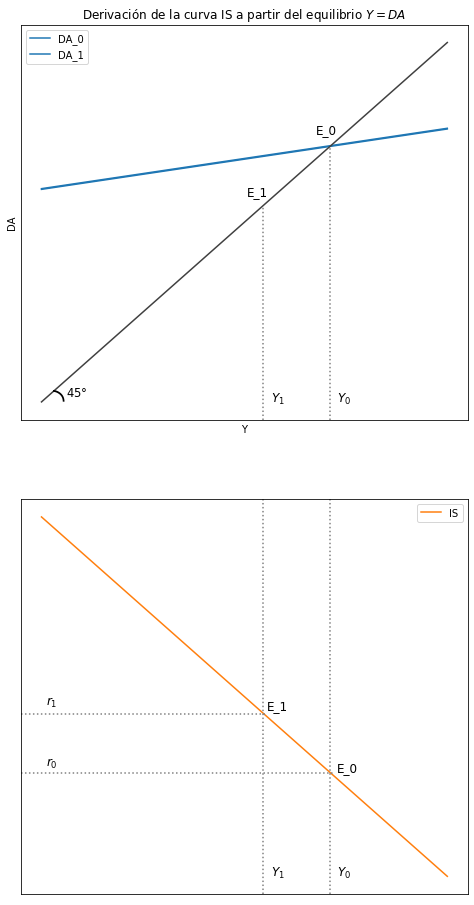

In [26]:
# Gráfico de la derivación de la curva IS a partir de la igualdad (DA = Y)

    # Dos gráficos en un solo cuadro (ax1 para el primero y ax2 para el segundo)
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: ingreso de Equilibrio
ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.plot(Y, DA_IS_K, label = "DA_0", color = "C0") 
ax1.plot(Y, DA_G, label = "DA_1", color = "C0") 
ax1.plot(Y, L_45, color = "#404040") 

ax1.axvline(x = 70.5, ymin= 0, ymax = 0.69, linestyle = ":", color = "grey")
ax1.axvline(x = 54,  ymin= 0, ymax = 0.54, linestyle = ":", color = "grey")

ax1.text(6, 4, '$45°$', fontsize = 11.5, color = 'black')
ax1.text(2.5, -3, '$◝$', fontsize = 30, color = 'black')
ax1.text(72, 0, '$Y_0$', fontsize = 12, color = 'black')
ax1.text(56, 0, '$Y_1$', fontsize = 12, color = 'black')
ax1.text(67, 185, 'E_0', fontsize = 12, color = 'black')
ax1.text(50, 142, 'E_1', fontsize = 12, color = 'black')

ax1.set(title = "Derivación de la curva IS a partir del equilibrio $Y=DA$", xlabel = r'Y', ylabel = r'DA')
ax1.legend()

#---------------------------------
    # Gráfico 2: Curva IS

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.plot(Y, r, label = "IS", color = "C1") 

ax2.axvline(x = 70.5, ymin= 0, ymax = 1, linestyle = ":", color = "grey")
ax2.axvline(x = 54,  ymin= 0, ymax = 1, linestyle = ":", color = "grey")
plt.axhline(y = 151.5, xmin= 0, xmax = 0.7, linestyle = ":", color = "grey")
plt.axhline(y = 165, xmin= 0, xmax = 0.55, linestyle = ":", color = "grey")

ax2.text(72, 128, '$Y_0$', fontsize = 12, color = 'black')
ax2.text(56, 128, '$Y_1$', fontsize = 12, color = 'black')
ax2.text(1, 153, '$r_0$', fontsize = 12, color = 'black')
ax2.text(1, 167, '$r_1$', fontsize = 12, color = 'black')
ax2.text(72, 152, 'E_0', fontsize = 12, color = 'black')
ax2.text(55, 166, 'E_1', fontsize = 12, color = 'black')

ax2.legend()

plt.show()

B.

LA CURVA IS O EL EQUILIBRIO AHORRO - INVERSIÓN


 
Para derivar IS, se hace desde la igualdad de Y (el ingreso) y DA (la Demanda Agregada)
     
$$ Y = C + I + G + X - M $$
                     
Entonces... 
$$Y = (Co + BY^d) + (Io - hr) + Go + Xo + (mY^d)$$
$$Y = DA$$

Para llegar al equilibrio de Ahorro-Inversión, hay restar la  T (tributación) de ambos
    
$$ Y - T = C + I - T + G + X - M $$

$$ Y^d = C + I - T + G + X - M $$

Luego despejar la I (Inversión)

$$ I = (Y^d - C) + (T - G) + (M - X) $$

De la anterior ecuación podemos obter que la Inversión es igual al ahorro total

ahorro total

$$ S(Y) = S_p + S_g + S_e $$

I es igual al ahorro total porque 

(Y^d - C) = ahorro privado
(T - G) = ahorro del gobierno
(M - X) = ahorro externo

por lo tanto...

$$ S(Y) = I(r) $$

Al reemplazar se tiene 


$$ S_p + S_g + S_e = I_0 - hr $$

$$ (Y^d - C_0 - bY^d) + (T - G_0) + (mY^d - X_0) = I_0 - hr $$


Viendo el equilibrio (Y)

$$ [1 - (b - m)(1 - t)]Y - (C_0 + G_0 + X_0) = I_0 - hr $$ 


La curva IS puede ser expresada de manera de ecuación donde la tasa de interés es una función del ingreso:

$$ hr = (C_0 + G_0 + I_0 + X_0) - (1 - (b - m)(1 - t))Y $$

$$ r = \frac{1}{h}(C_0 + G_0 + I_0 + X_0) - \frac{1 - (b - m)(1 - t)}{h}Y $$


al simplificar nos queda: 

$$ r = \frac{B_0}{h} - \frac{B_1}{h}Y $$

Donde $ B_0 = C_0 + G_0 + I_0 + X_0  $ es el intercepto y $  B_1 = 1 - (b - m)(1 - t) $ es la pendiente.

$GRAFICO$

In [31]:

# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

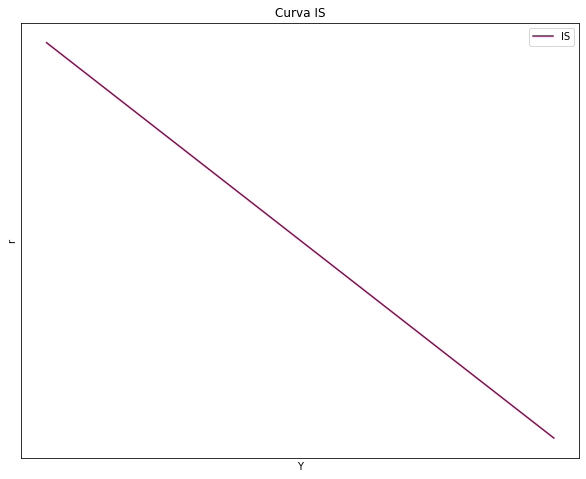

In [32]:
# Gráfico de la curva IS

# Dimensiones del gráfico
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "#8B0A50") #Demanda agregada

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title = "Curva IS", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()


C

D.

Utilizando el modelo macroeconómico en a) responda los siguiente:




Analice una Política Fiscal Contractiva con caída del Gasto del Gobierno . El análisis debe ser intuitivo y gráfico.


In [34]:
#Para la diferencial
#1. Se debe encontrar la ecuación de equilibrio
Yequi = (1 / (1-(b-m)*(1-t))) * (Co + Io + Go + Xo - h*r)

#2. Declarar cada elemento/variable(excepto Y) como symbol 
Co, Io, Go, Xo, h, r, b, m, r = symbols('Co Io Go Xo h r b m r')

#3. Ejecutar la funcion diff para encontrar el diferencial
dYequi_Go = diff(Yequi, Go)
dYequi_Go


1/(-0.7*b + 0.7*m + 1)

1. 
Si cae el Gasto de Gobierno se dará un desequilibrio entre el ingreso y la demanda agregada. Lo cual produce que se deba utilizar el modelo Keynesiano para así poder regresar a un equilibrio

In [38]:
# Parametros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Nueva Curva

# Define ONLY the changed parameter
Go = 25

# Equation with the changed parameter
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

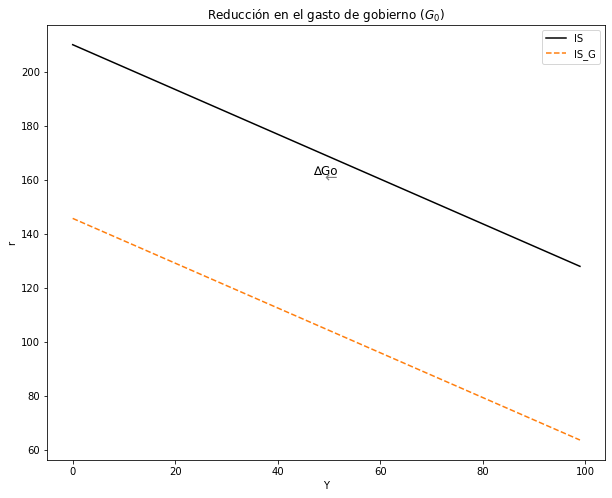

In [40]:
#Gráfico

# Dimensiones
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS", color = "black") #IS orginal
ax.plot(Y, r_G, label = "IS_G", color = "C1", linestyle = 'dashed') #New IS

# Texto
plt.text(47, 162, '∆Go', fontsize=12, color='black')
plt.text(49, 159, '←', fontsize=15, color='grey')

# Titulo
ax.set(title = "Reducción en el gasto de gobierno $(G_0)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

Analice una Política Fiscal Expansiva con una caída de la Tasa de Impuestos . El análisis debe ser intuitivo y gráfico.

In [37]:
#Para la diferencial
#1. Se debe encontrar la ecuación de equilibrio
Yequi = (1 / (1-(b-m)*(1-t))) * (Co + Io + Go + Xo - h*r)

#2. Declarar cada elemento/variable(excepto Y) como symbol 
Co, Io, Go, Xo, h, r, b, m, r = symbols('Co Io Go Xo h r b m r')

#3. Ejecutar la funcion diff para encontrar el diferencial
dYequi_r = diff(Yequi, r)
dYequi_r 

-h/(-0.7*b + 0.7*m + 1)

In [42]:
# Parametros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Nueva Curva

# Define ONLY the changed parameter
t = 0.09

# Equation with the changed parameter
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

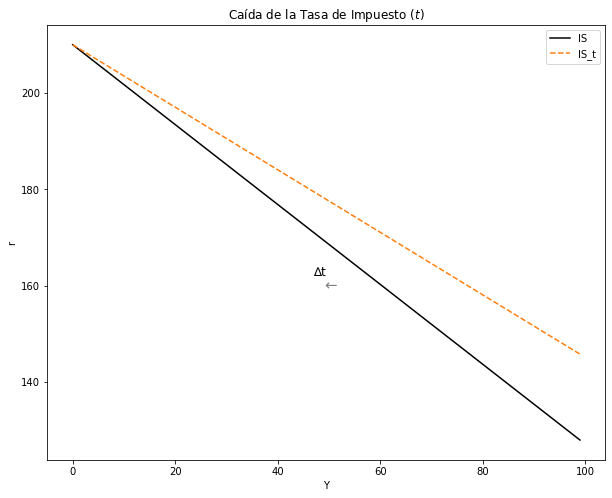

In [46]:
#Gráfico

# Dimensiones
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS", color = "black") #IS orginal
ax.plot(Y, r_G, label = "IS_t", color = "C1", linestyle = 'dashed') #New IS

# Texto
plt.text(47, 162, '∆t', fontsize=12, color='black')
plt.text(49, 159, '←', fontsize=15, color='grey')

# Titulo
ax.set(title = "Caída de la Tasa de Impuesto $(t)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

Con una caída en la tasa de impuestos, aumenta más el dinero que tiene cada familia y por lo tanto el consumo. Esto también crea desequilibrio

3.
Analice una caída de la Propensión Marginal a Consumir . El análisis debe ser intuitivo y gráfico.

In [49]:
#Para la diferencial
#1. Se debe encontrar la ecuación de equilibrio
Yequi = (1 / (1-(b-m)*(1-t))) * (Co + Io + Go + Xo - h*r)

#2. Declarar cada elemento/variable(excepto Y) como symbol 
Co, Io, Go, Xo, h, r, b, m, r = symbols('Co Io Go Xo h r b m r')

#3. Ejecutar la funcion diff para encontrar el diferencial
dYequi_b = diff(Yequi, b)
dYequi_b

-0.91*(Co + Go + Io + Xo - h*r)/(-0.91*b + 0.91*m + 1)**2

In [56]:
# Parametros

Y_size = 100 

Co = 35
Io = 40
Go = 70
Xo = 2
h = 0.7
b = 0.8
m = 0.2
t = 0.3

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Nueva Curva

# Define ONLY the changed parameter
b = 0.45

# Equation with the changed parameter
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

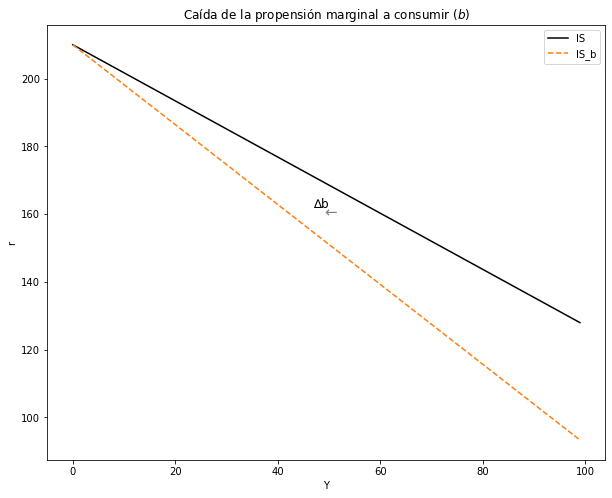

In [57]:
#Gráfico

# Dimensiones
y_max = np.max(r)
fig, ax = plt.subplots(figsize=(10, 8))

# Curves to plot
ax.plot(Y, r, label = "IS", color = "black") #IS orginal
ax.plot(Y, r_G, label = "IS_b", color = "C1", linestyle = 'dashed') #New IS

# Texto
plt.text(47, 162, '∆b', fontsize=12, color='black')
plt.text(49, 159, '←', fontsize=15, color='grey')

# Titulo
ax.set(title = "Caída de la propensión marginal a consumir $(b)$", xlabel= 'Y', ylabel= 'r')
ax.legend()

plt.show()

al caer la propension marginal a consumir, cae el consumo total por familia. esto afecta a la demanda agregada y al ingreso total